# PyTorch QuickGuide

Author: Kellen Sullivan

This is a quick guide for how to load in pre-built models provided by PyTorch to train and deploy on your own on dataset. If you are interested in learning all the PyTorch basics, and how to build your very own model, checkout the official PyTorch begineers guide [here](https://docs.pytorch.org/tutorials/beginner/basics/intro.html).

## Getting Started
To get started using PyTorch, you first have to install it! To do so, open a new terminal and run the following command:

- If you are on Windows/Mac: `pip3 install torch torchvision`
- If you are on Linux: `pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu`

Note that these commands will use your CPU as the compute platform. If you have an NVIDIA GPU, you can install PyTorch with CUDA as the compute platform to greatly speed up training. Check out the official installation guide to learn more: https://pytorch.org/get-started/locally/

You can confirm PyTorch was successfully installed by importing the package and printing out its version.

In [15]:
import torch

print(torch.__version__)

2.8.0+cpu


## Loading a Prebuilt Model

PyTorch has libraries such as [torchvision](https://docs.pytorch.org/vision/0.8/models.html), [torchaudio](https://docs.pytorch.org/audio/stable/models.html), and [torchtext](https://docs.pytorch.org/text/stable/models.html) that provide prebuilt models to quickly process image data, audio data, or text data. In this quickguide, we will use a prebuilt model from torchvision to classify images into 1 of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

### Datasets

Before we load in a prebuilt model, we need to get the data our model will train on. Thankfully torchvision also provides datasets that can be easily accessed to train neural networks in PyTorch, including the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset that we will be training a model on!

To load in the CIFAR-10 dataset, we can use the following code. Note that the CIFAR-10 dataset contains 32x32 pixel images, but the prebuilt models from torchvision expect 224x224 pixel images. Thus we define a transform and apply it to the CIFAR-10 images so that the prebuilt models will work with our data.  

In [16]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images: 32x32 -> 224x224
    transforms.ToTensor()
])

training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

To quickly check that we successfully loaded in the data, let's print a random example image from the training dataset.

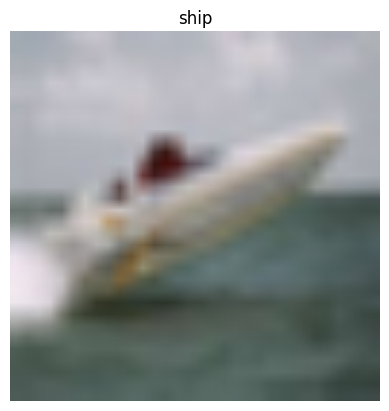

In [18]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(training_data) - 1)
img, label = training_data[idx]

# show image
plt.imshow(img.permute(1, 2, 0))
plt.title(training_data.classes[label])
plt.axis("off")
plt.show()

### Dataloader

When training and testing the model, we will repeatedly need to iterate through our datasets, optimally in batches. Thankfully, PyTorch provides DataLoaders to make this process easy.

The following code creates two DataLoaders, one for each dataset.

In [19]:
from torch.utils.data import DataLoader

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

### Prebuilt Models

Now that we have loaded our data and can iterate through it, we can load in our pre-built model! You can read about many different prebuilt models provided by torchvision [here](https://docs.pytorch.org/vision/0.9/models.html). For this quickguide we will use the resnet18 model due to its moderate size and robust feature extraction capabilities.  

In [22]:
import torchvision.models as models
import torch.nn as nn
resnet_model = models.resnet18(weights=None)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 10)  # CIFAR-10 has 10 classes NEED TO EXPLAIN THIS MORE

## Train a Model

Now we need to train a model, so that it can accurately classify images. To do so, we first need to declare a [loss function](https://docs.pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#loss-function) and [optimizer](https://docs.pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#optimizer). 

In [26]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)

In [28]:
running_loss = 0.0
for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = resnet_model(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    # Track running loss
    running_loss += loss.item()
    if (i + 1) % 5 == 0:  # print every 5 mini-batches
        print(f"[Batch {i+1:5d}] loss: {running_loss / 5:.4f}")
        running_loss = 0.0

print("Finished Training")

[Batch     5] loss: 1.6083


KeyboardInterrupt: 

## Evaluate a Model

In [ ]:
correct, total = 0, 0
resnet_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = resnet_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test accuracy: {100 * correct / total:.2f}%")

## Save a Model

In [ ]:
torch.save(resnet_model, 'model.pth') # save model to model.pth file
resnet_model = torch.load('model.pth', weights_only=False)

In [ ]:
torch.save(resnet_model.state_dict(), 'model_weights.pth') # save model weights to model_weights.pth

new_model = models.resnet18()
new_model.load_state_dict(torch.load('model_weights.pth', weights_only=True)) # load model weights into new model

## Conclusion and Further Readings

If you want to learn all the PyTorch basics, check out some of these resources:
- [Official PyTorch Begineers Guide](https://docs.pytorch.org/tutorials/beginner/basics/intro.html).
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://docs.pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

Congratulations for completing the PyTorch Quick Guide! 🎓🎉 You now have the skills to load, train, and test a PyTorch Model!